In [1]:
import kan
import kan.utils as ku
import torch
import torch.nn as nn
import numpy as np
from libraries import utils
from libraries import magnetization
from libraries import j1j2_functions
import numpy.random as npr
import qutip as qt
import sympy
import random

In [2]:
N=10
input = utils.generate_input_torch(N)
labels = torch.tensor([-1 + 2 * (magnetization.count_half_magnetization(i) % 2) for i in range(2 ** N)]).reshape((-1, 1))

In [3]:
dataset = {'train_input': input, 'train_label': labels, 'test_input': input, 'test_label': labels}
kan_model = kan.KAN(width = [N, N, N, 1, 1])
kan_model(dataset['train_input']);

checkpoint directory created: ./model
saving model version 0.0


In [4]:
tanh = lambda x : torch.tanh(x)
kan_model.fix_symbolic(3, 0, 0, tanh)
kan_model.symbolic_fun[3].affine = nn.Parameter(torch.tensor([[[1, 0, 1, 0]]], dtype = torch.float64), requires_grad=False)
# for i in range(N):
#     for j in range(N):
#         kan_model.fix_symbolic(0, j, i, 'x', verbose=False)

saving model version 0.1


In [5]:
kan_model.fit(dataset, steps=20, lamb=1e-4);

| train_loss: 7.85e-03 | test_loss: 7.85e-03 | reg: 1.65e+01 | : 100%|█| 20/20 [00:35<00:00,  1.76s/

saving model version 0.2


saving model version 0.3


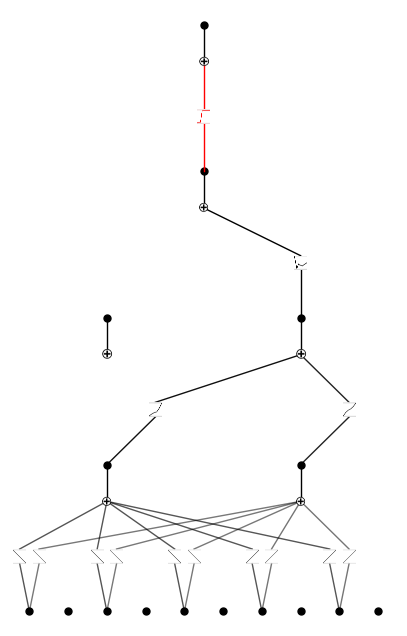

In [ ]:
kan_model.prune().plot() # it seems sometimes pruning will turn a functional network into a non-functional one (loss xe-3 -> 1)

In [7]:
kan_model = kan_model.prune()
kan_model.symbolic_fun[3].affine = nn.Parameter(kan_model.symbolic_fun[3].affine.data, requires_grad=False)

saving model version 0.3


In [8]:
kan_model.fit(dataset, steps=20, lamb=1.5e-4); # sometimes pruning makes the model fail??

| train_loss: nan | test_loss: nan | reg: nan | :  25%|███▌          | 5/20 [00:03<00:09,  1.59it/s]

lstsq failed




KeyboardInterrupt



    function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        tan    0.925056 -3.737857           3                3   -1.716500
1        log    0.884212 -3.110312           2                2   -1.577218
2  1/sqrt(x)    0.868251 -2.924031           2                2   -1.446822
3    1/x^0.5    0.868251 -2.924031           2                2   -1.446822
4       sqrt    0.863023 -2.867888           2                2   -1.407521
5      x^0.5    0.863023 -2.867888           2                2   -1.407521
6        1/x    0.857875 -2.814670           2                2   -1.370269
7      1/x^2    0.845706 -2.696150           2                2   -1.287305
8        x^3    0.876860 -3.021516           3                3   -1.215061
9    arctanh    0.900149 -3.323928           4                4   -1.126749


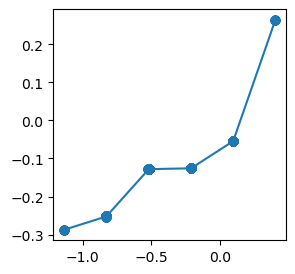

In [8]:
kan_model.suggest_symbolic(1, 0, 0, weight_simple=0.3, topk=10);
kan_model.get_fun(1, 0, 0);

   function  fitting r2    r2 loss  complexity  complexity loss  total loss
0  gaussian    0.999999 -16.454864           3                3  -10.618405
1      tanh    0.999999 -16.454864           3                3  -10.618405
2       cos    0.999973 -14.708203           2                2   -9.695742
3       sin    0.999973 -14.705903           2                2   -9.694132
4    arctan    0.999975 -14.810738           4                4   -9.167517
5       x^2    0.999860 -12.707234           2                2   -8.295064
6     x^1.5    0.999845 -12.564448           4                4   -7.595114
7       x^3    0.999648 -11.433049           3                3   -7.103134
8       x^4    0.999554 -11.097856           3                3   -6.868499
9       exp    0.999334 -10.529751           2                2   -6.770826


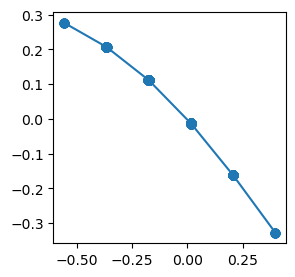

In [9]:
kan_model.suggest_symbolic(1, 1, 0, weight_simple=0.3, topk=10);
kan_model.get_fun(1, 1, 0);

    function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        tan    0.868127 -2.922666           3                3   -1.145866
1        1/x    0.753521 -2.020406           2                2   -0.814284
2      1/x^2    0.725085 -1.862891           2                2   -0.704024
3  1/sqrt(x)    0.707258 -1.772250           2                2   -0.640575
4    1/x^0.5    0.707258 -1.772250           2                2   -0.640575
5      1/x^3    0.750222 -2.001222           3                3   -0.500855
6        sgn    0.725841 -1.866860           3                3   -0.406802
7   gaussian    0.725834 -1.866828           3                3   -0.406780
8       tanh    0.714844 -1.810127           3                3   -0.367089
9        exp    0.606071 -1.343955           2                2   -0.340768


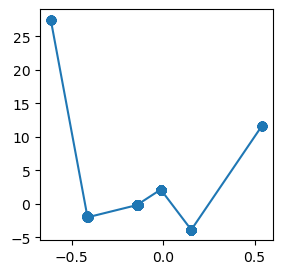

In [10]:
kan_model.suggest_symbolic(2, 0, 0, weight_simple=0.3, topk=10);
kan_model.get_fun(2, 0, 0);

In [11]:
for i in range(0, N, 2):
    kan_model.fix_symbolic(0, i, 0, 'x');
    kan_model.fix_symbolic(0, i, 1, 'x');
kan_model.fix_symbolic(1, 0, 0, 'tan');
kan_model.fix_symbolic(1, 1, 0, 'cos');

r2 is 1.0000014305114746
saving model version 0.4
r2 is 1.0000007152557373
saving model version 0.5
Best value at boundary.
r2 is 1.0000008344650269
saving model version 0.6
r2 is 1.000001072883606
saving model version 0.7
r2 is 1.0000011920928955
saving model version 0.8
Best value at boundary.
r2 is 1.0000009536743164
saving model version 0.9
Best value at boundary.
r2 is 1.0000007152557373
saving model version 0.10
r2 is 1.0000009536743164
saving model version 0.11
r2 is 1.0000011920928955
saving model version 0.12
Best value at boundary.
r2 is 1.0000007152557373
saving model version 0.13
r2 is 0.9250563383102417
saving model version 0.14
r2 is 0.9999726414680481
saving model version 0.15


In [12]:
kan_model.fit(dataset, lamb=1e-4, steps=20);

| train_loss: 1.32e+00 | test_loss: 1.32e+00 | reg: 9.95e-02 | : 100%|█| 20/20 [00:05<00:00,  3.39it

saving model version 0.16


saving model version 0.17


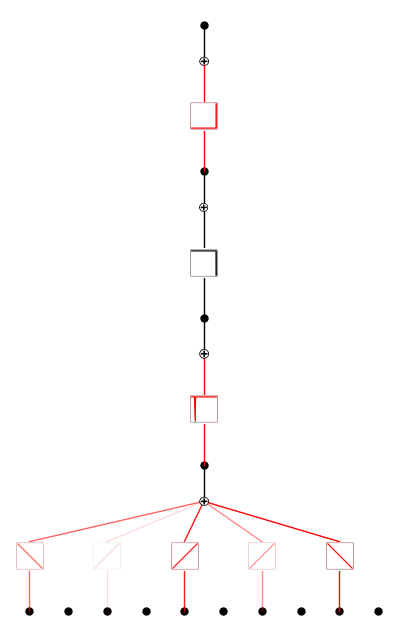

In [13]:
kan_model.prune().plot()